In [1]:
import pandas as pd
import seaborn as sns
data = pd.read_csv("titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

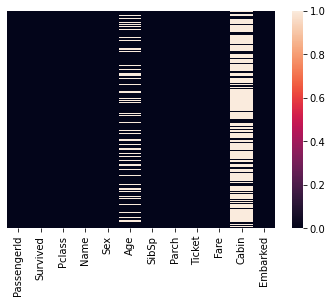

In [3]:
sns.heatmap(data.isnull(), yticklabels = False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

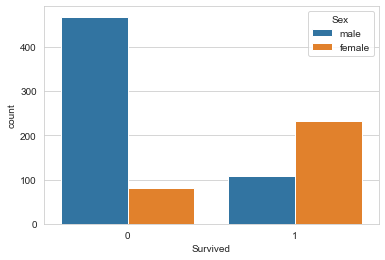

In [4]:
sns.set_style("whitegrid")
sns.countplot(data = data, x = "Survived", hue = "Sex")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

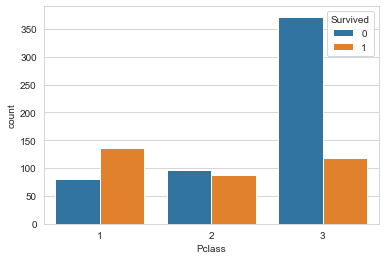

In [5]:
sns.countplot(data = data, x = "Pclass", hue = "Survived")

c:\users\rajve\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

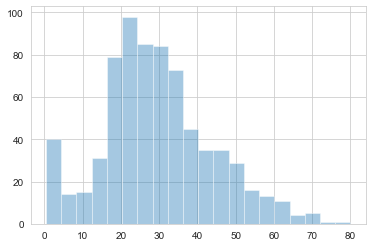

In [6]:
sns.distplot(x = data["Age"], kde= False)

In [7]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

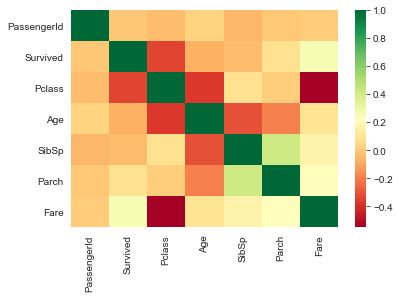

In [8]:
sns.heatmap(data.corr(), cmap = "RdYlGn")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

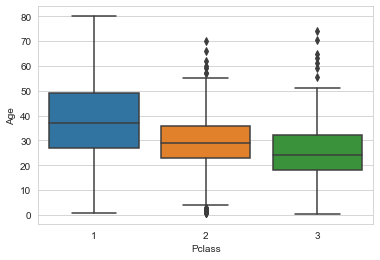

In [9]:
sns.boxplot(data = data, x = "Pclass", y = "Age")

In [10]:
def age_calc(cols): 
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
    
        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 25

    else:
        return Age

<AxesSubplot:>

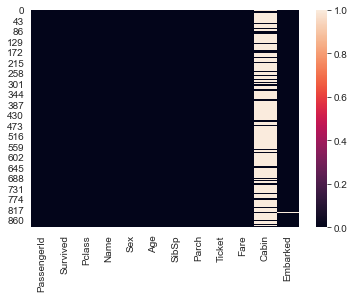

In [11]:
data["Age"] = data[["Age", "Pclass"]].apply(age_calc, axis = 1)
sns.heatmap(data.isnull())

In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.219046,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.190858,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Embarked', ylabel='count'>

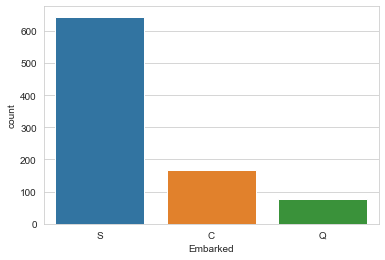

In [13]:
sns.countplot(data = data, x = "Embarked")

In [14]:
def  null_soln(cols):
    Embarked = cols
    
    if pd.isnull(Embarked):
        return "S"
        
    else:
        return Embarked

<AxesSubplot:>

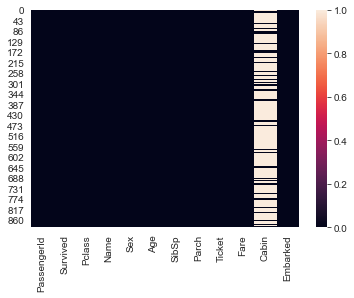

In [15]:
data["Embarked"] = data["Embarked"].apply(null_soln)
sns.heatmap(data = data.isnull())

<AxesSubplot:xlabel='Embarked', ylabel='count'>

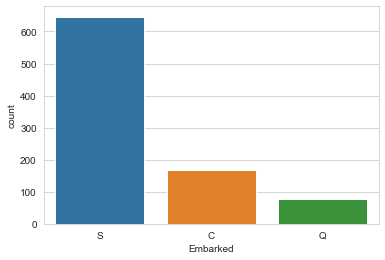

In [16]:
sns.countplot(data = data, x = "Embarked" )

<AxesSubplot:xlabel='Cabin', ylabel='count'>

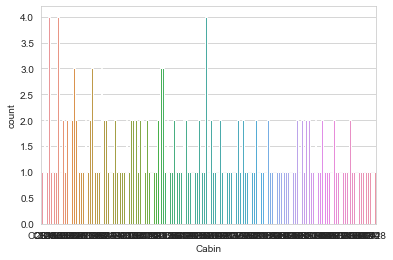

In [17]:
sns.countplot(data  = data, x= "Cabin")

In [18]:
data = data.drop(labels = ["Ticket", "PassengerId","Name","Cabin"], axis = 1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,25.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [19]:
data_dummied = pd.get_dummies(data = data, drop_first= True)
data_dummied

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,25.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [20]:
data_x = data_dummied.drop(labels = "Survived", axis = 1)
data_x

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,25.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [21]:
data_y = data_dummied["Survived"]
data_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x, data_y, test_size= 0.2)

In [23]:
'''
LOGISTIC REGRESSION MODEL
'''
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(data_x_train, data_y_train)

c:\users\rajve\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
data_y_pred = model.predict(data_x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true = data_y_test, y_pred = data_y_pred))

0.7932960893854749


In [25]:
'''
SUPPORT VECTOR CLASSIFIER
'''
from sklearn.svm import SVC

svc_model = SVC(kernel = "linear")
svc_model.fit(data_x_train, data_y_train)
svc_y_pred = svc_model.predict(data_x_test)

In [26]:
print(accuracy_score(y_true = data_y_test, y_pred = svc_y_pred))

0.8044692737430168


In [29]:
'''
DECISION TREE CLASSIFIER
'''

'\nDECISION TREE CLASSIFIER\n'

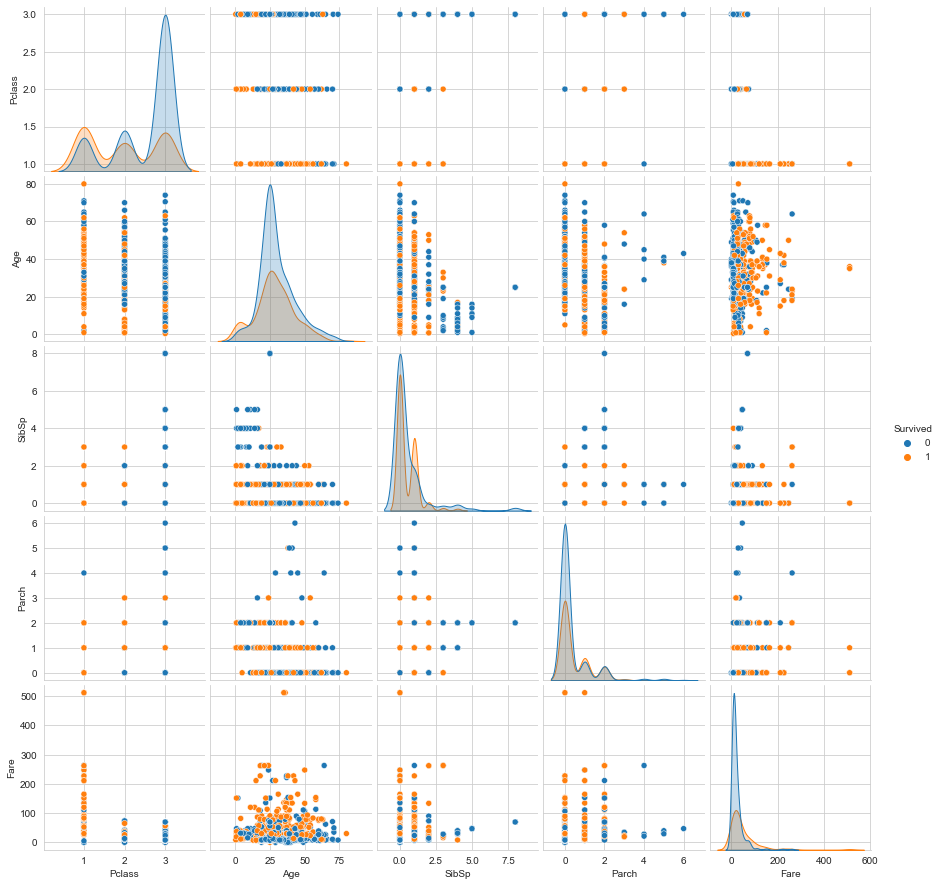

In [32]:
sns.set_style(style = None)
sns.pairplot(data = data, hue = "Survived")

In [48]:
from sklearn.tree import DecisionTreeClassifier
dc_model = DecisionTreeClassifier()
dc_model.fit(data_x_train, data_y_train)
dc_y_pred = dc_model.predict(data_x_test)

In [50]:
print(accuracy_score(y_true = data_y_test, y_pred = dc_y_pred))

0.7988826815642458


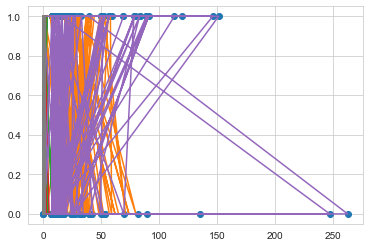

In [51]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(x = data_x_test["Fare"], y = data_y_test)
plt.plot(data_x_test, dc_y_pred)

plt.show()

In [49]:
print(dc_y_pred)
print()
print(data_y_pred)
print()
print(svc_y_pred)

[0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0
 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1
 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0]

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1
 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1
 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0
 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0]

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1
 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1
 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 

In [52]:
print(model.coef_)

[[-1.18010303 -0.05050672 -0.33873246 -0.15794702  0.00382925 -2.57793734
   0.13715794 -0.14040616]]
